<a href="https://colab.research.google.com/github/Kai71584/robot-algo/blob/main/Projet_INF1823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pour afficher le temps d'exécution
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.07 s (started: 2024-12-06 21:20:12 +00:00)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FastICA

# Load the wine dataset into a DataFrame
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
target = wine.target

print(wine_df)

# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

Affichage de toutes les corrélations supérieurs à 0.5:
Attribut 1:  alcohol Attribut 2:   color_intensity Correlation:  0.5463641950837039

Attribut 1:  alcohol Attribut 2:   proline Correlation:  0.6437200371782135

Attribut 1:  total_phenols Attribut 2:   flavanoids Correlation:  0.8645635000951151

Attribut 1:  total_phenols Attribut 2:   proanthocyanins Correlation:  0.612413083780036

Attribut 1:  total_phenols Attribut 2:   od280/od315_of_diluted_wines Correlation:  0.6999493647911861

Attribut 1:  flavanoids Attribut 2:   total_phenols Correlation:  0.8645635000951151

Attribut 1:  flavanoids Attribut 2:   proanthocyanins Correlation:  0.6526917686075147

Attribut 1:  flavanoids Attribut 2:   hue Correlation:  0.5434785664899893

Attribut 1:  flavanoids Attribut 2:   od280/od315_of_diluted_wines Correlation:  0.7871939018669505

Attribut 1:  proanthocyanins Attribut 2:   total_phenols Correlation:  0.6124130837800359

Attribut 1:  proanthocyanins Attribut 2:   flavanoids Correla

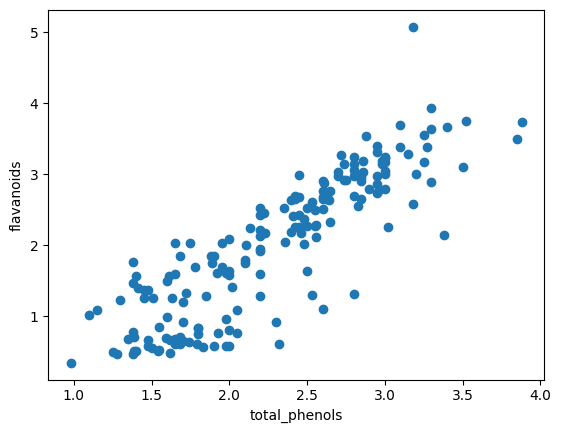

La plus grande corrélation est avec attribut 1:  total_phenols Attribut 2:   flavanoids avec une correlation de:  0.8645635000951151
time: 496 ms (started: 2024-12-06 21:20:22 +00:00)


In [ ]:
# A) Corrélation et visualisation
max_corr = 0
max_attribut1 = ''
max_attribut2 = ''
print('Affichage de toutes les corrélations supérieurs à 0.5:') #on va rechercher toutes les combinaisons d'attributs qui nous donne une corrélation supérieur à 0.5%

for column in wine_df:
  for columns in wine_df:
    if column != columns: # on mesure la corrélation entre chacune des colonnes, sauf avec elle-même
      x= wine_df[column]
      y= wine_df[columns]

      correlation = x.corr(y) # calcule du coefficient de corrélation

      if correlation > 0.5: # on affiche seulement les corrélations supérieurs à 0.5%
        print('Attribut 1: ', column, 'Attribut 2:  ', columns, 'Correlation: ', correlation)
        print('')
        if correlation > max_corr: # on vérifie si la corrélation calcule est supérieur au maximum, afin de conserver la plus grande corrélation
          max_corr = correlation
          max_attribut1 = column
          max_attribut2 = columns

# on affiche la plus grande corrélation avec un nuage de points
print('Visualition de la plus grande corrélation')
plt.scatter(wine_df[max_attribut1], wine_df[max_attribut2])
plt.xlabel(max_attribut1)
plt.ylabel(max_attribut2)
plt.show()
print('La plus grande corrélation est avec attribut 1: ', max_attribut1, 'Attribut 2:  ', max_attribut2, 'avec une correlation de: ', max_corr)


In [ ]:
# B) Classification et gestion des données manquantes
# Question 1.
new_d = [13, 2, 2, 20, 99, 2, 2, 0.4, 2, 5, 1, 2.5, 500]
# on utilise les 3 plus proches voisins pour déterminer la classe du la nouvelle donnée avec la librairie de sklearn.neighbors KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(wine_df, target)
print ('La classe prédite est : ', neigh.predict([new_d]))

# Question 2
new_d2 = [np.NaN, np.NaN, 3, 15, 80, 3, 1, 0.3, 2, 5, 1, 2.5, 500]
#pour trouver les valeurs manquantes, on les remplace par la moyenne de la colonne alcohol et malic_acid
new_d2[0] = round(np.mean(wine_df['alcohol']), 2)
new_d2[1] = round(np.mean(wine_df['malic_acid']), 2)
print('La donnée avec les valeurs manquantes est maintenant: ', new_d2)

La classe prédite est :  [1]
La donnée avec les valeurs manquantes est maintenant:  [13.0, 2.34, 3, 15, 80, 3, 1, 0.3, 2, 5, 1, 2.5, 500]
time: 19.2 ms (started: 2024-12-06 21:20:22 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_df, wine.target, test_size=0.3)

time: 4.03 ms (started: 2024-12-06 21:20:22 +00:00)


La précision avec KNN avant la réduction est de:  0.7777777777777778
La précision avec un arbre de décision avant la réduction est de:  0.9259259259259259
La précision, du KNN, après la réduction de dimension avec PCA est de: 0.7592592592592593
La précision, dun arbre de décision, apres la réduction avec PCA est de:  0.8148148148148148
La proportion de variance pour chaque composante est:  [0.99796279 0.00183614]


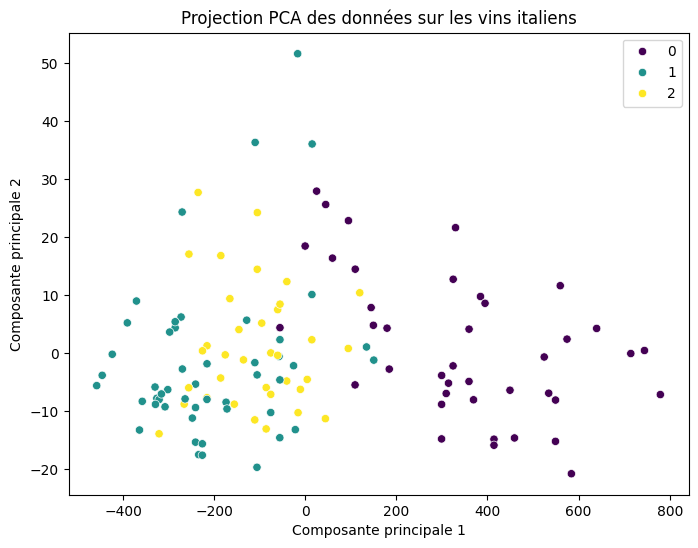

time: 596 ms (started: 2024-12-06 21:20:22 +00:00)


In [ ]:
# C) Réduction de dimension et son impact sur la prédiction de classe
def mesure_precision (model, X_train, y_train, X_test, y_test): #Fonction qui permet de mesurer le taux de précision d'une prédiction afin d'éviter la répétion de code
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  precision = accuracy_score(y_test, y_prediction)
  return precision

#Question 1C)
#!!!!!!!!!!!!!!!!!!!!!!       PCA      !!!!!!!!!!!!!!!!!!!!!!!!

#prédiction avant réduction
#prédiction avec k plus proches voisins
neigh = KNeighborsClassifier(n_neighbors = 3)
precision_avant_KNN = mesure_precision(neigh, X_train, y_train, X_test, y_test)
print('La précision avec KNN avant la réduction est de: ', precision_avant_KNN)

#prédiction avec un arbre de décision
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=14)
precision_avant_clf = mesure_precision(clf, X_train, y_train, X_test, y_test)
print('La précision avec un arbre de décision avant la réduction est de: ', precision_avant_clf)

#Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#prédiction apres réduction
#prédiction avec k plus proches voisins
precision_apres_KNN = mesure_precision(neigh, X_train_pca, y_train, X_test_pca, y_test)
print('La précision, du KNN, après la réduction de dimension avec PCA est de:', precision_apres_KNN)

#prédiction avec un arbre de décision
precision_apres_clf = mesure_precision(clf, X_train_pca, y_train, X_test_pca, y_test)
print('La précision, dun arbre de décision, apres la réduction avec PCA est de: ', precision_apres_clf)
print('La proportion de variance pour chaque composante est: ', pca.explained_variance_ratio_) #affiche le pourcentage de variance que représente un composant

#Visualisation PCA en 2 dimensions
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue = y_train, palette="viridis")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA des données sur les vins italiens")
plt.show()

La précision avant la réduction est de:  0.7777777777777778
La précision clf avant la réduction est de:  0.9259259259259259
La prédiction, du KNN, après la réduction de dimension avec PCA est de: 0.7777777777777778
La précision, dun arbre de décision, apres la réduction avec PCA est de:  0.7962962962962963
La proportion de variance pour chaque composante est:  [9.97962793e-01 1.83614187e-03 1.10431537e-04]


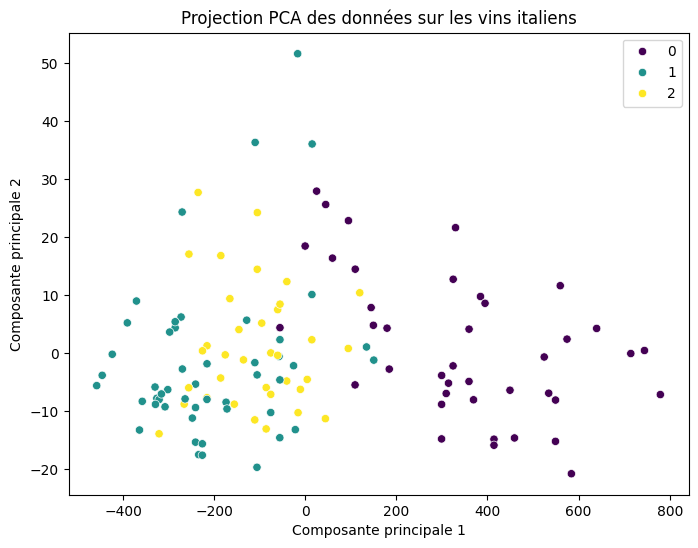

time: 577 ms (started: 2024-12-06 21:20:23 +00:00)


In [ ]:
# C) Réduction de dimension et son impact sur la prédiction de classe
def mesure_precision (model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  precision = accuracy_score(y_test, y_prediction)
  return precision
#Question 1C)
#!!!!!!!!!!!!!!!!!!!!!!       PCA      !!!!!!!!!!!!!!!!!!!!!!!!
#prediction avant reduction
#prediction avec k plus proches voisins
neigh = KNeighborsClassifier(n_neighbors = 3)
precision_avant_KNN = mesure_precision(neigh, X_train, y_train, X_test, y_test)
print('La précision avant la réduction est de: ', precision_avant_KNN)

#prediction avec un arbre de décision
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=14)
precision_avant_clf = mesure_precision(clf, X_train, y_train, X_test, y_test)
print('La précision clf avant la réduction est de: ', precision_avant_clf)

#Reduction de dimension avec PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#prediction apres reduction
#prediction avec k plus proches voisins
precision_apres_KNN = mesure_precision(neigh, X_train_pca, y_train, X_test_pca, y_test)
print('La prédiction, du KNN, après la réduction de dimension avec PCA est de:', precision_apres_KNN)

#prediction avec un arbre de décision
precision_apres_clf = mesure_precision(clf, X_train_pca, y_train, X_test_pca, y_test)
print('La précision, dun arbre de décision, apres la réduction avec PCA est de: ', precision_apres_clf)
print('La proportion de variance pour chaque composante est: ', pca.explained_variance_ratio_)

La précision pour KNN avant la réduction est de:  0.7777777777777778
La précision pour un arbre de décision avant la réduction est de:  0.9259259259259259
La précision, du KNN, après la réduction de dimension avec LDA est de:  1.0
La précision, dun arbre de décision, apres la réduction avec LDA est de:  0.9814814814814815


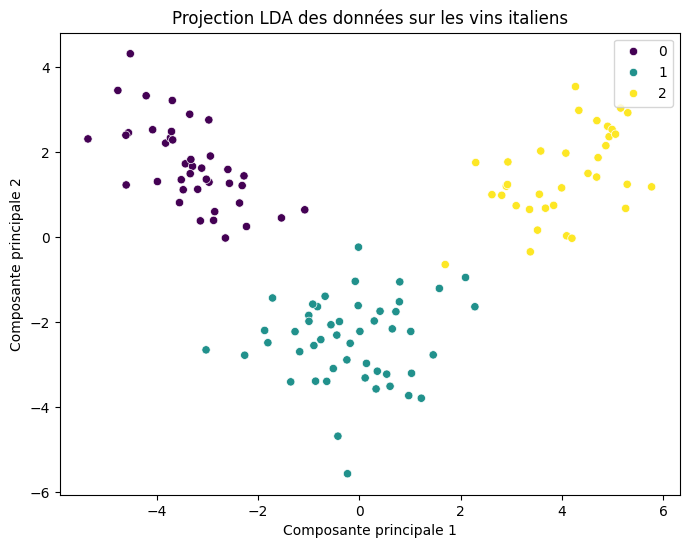

time: 619 ms (started: 2024-12-06 21:20:23 +00:00)


In [ ]:
#!!!!!!!!!!!!!!!!!!!      LDA               !!!!!!!!!!!!!!!!!!!!!!
#prediction avant reduction
#prediction avec k plus proches voisins
neigh = KNeighborsClassifier(n_neighbors = 3)
precision_avant_KNN = mesure_precision(neigh, X_train, y_train, X_test, y_test)
print('La précision pour KNN avant la réduction est de: ', precision_avant_KNN)

#prediction avec un arbre de décision
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=14)
precision_avant_clf = mesure_precision(clf, X_train, y_train, X_test, y_test)
print('La précision pour un arbre de décision avant la réduction est de: ', precision_avant_clf)

# Appliquer LDA pour réduire à 2 dimensions
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#prediction apres reduction
#prediction avec k plus proches voisins
precision_apres_KNN = mesure_precision(neigh, X_train_lda, y_train, X_test_lda, y_test)
print('La précision, du KNN, après la réduction de dimension avec LDA est de: ', precision_apres_KNN)

#prediction avec un arbre de décision
precision_apres_clf = mesure_precision(clf, X_train_lda, y_train, X_test_lda, y_test)
print('La précision, dun arbre de décision, apres la réduction avec LDA est de: ', precision_apres_clf)

#Visualisation LDA en 2 dimensions
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue = y_train, palette="viridis")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection LDA des données sur les vins italiens")
plt.show()

La précision pour KNN avant la réduction est de:  0.7407407407407407
La précision pour un arbre de décision avant la réduction est de:  0.9259259259259259
La précision, du KNN, après la réduction de dimension avec ICA est de:  0.9259259259259259
La précision, dun arbre de décision, apres la réduction avec ICA est de:  0.8888888888888888


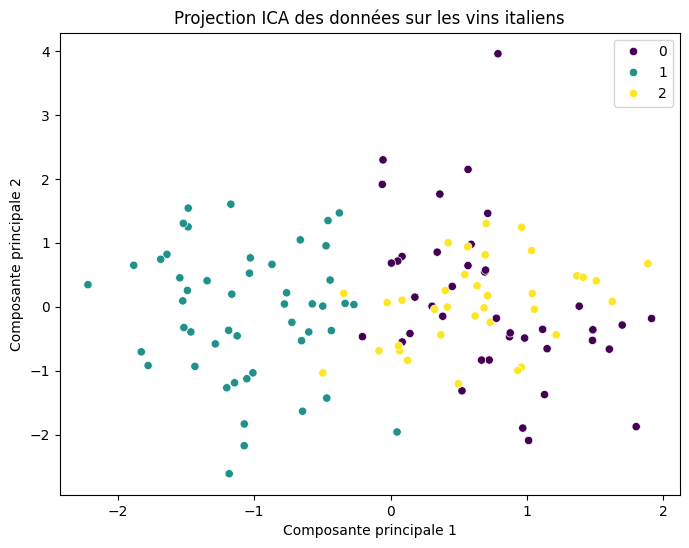

time: 782 ms (started: 2024-12-06 21:20:24 +00:00)


In [ ]:
#!!!!!!!!!!!!!!!!!!!       ICA       !!!!!!!!!!!!!!!!!!!!
#prediction avant reduction
#prediction avec k plus proches voisins
neigh = KNeighborsClassifier(n_neighbors = 9)
precision_avant_KNN = mesure_precision(neigh, X_train, y_train, X_test, y_test)
print('La précision pour KNN avant la réduction est de: ', precision_avant_KNN)

#prediction avec un arbre de décision
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=14)
precision_avant_clf = mesure_precision(clf, X_train, y_train, X_test, y_test)
print('La précision pour un arbre de décision avant la réduction est de: ', precision_avant_clf)

# Appliquer ICA pour réduire à 6 dimensions
ica = FastICA(n_components=6, random_state=0)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

#prediction apres reduction
#prediction avec k plus proches voisins
precision_apres_KNN = mesure_precision(neigh, X_train_ica, y_train, X_test_ica, y_test)
print('La précision, du KNN, après la réduction de dimension avec ICA est de: ', precision_apres_KNN)

#prediction avec un arbre de décision
precision_apres_clf = mesure_precision(clf, X_train_ica, y_train, X_test_ica, y_test)
print('La précision, dun arbre de décision, apres la réduction avec ICA est de: ', precision_apres_clf)

#Visualisation ICA en 2 dimensions
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_ica[:, 0], y=X_train_ica[:, 1], hue = y_train, palette="viridis")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection ICA des données sur les vins italiens")
plt.show()

In [ ]:
#!!!!!!!!!!!!!!!!!!!       ICA       !!!!!!!!!!!!!!!!!!!!
#prediction avant reduction
#prediction avec k plus proches voisins
neigh = KNeighborsClassifier(n_neighbors = 3)
precision_avant_KNN = mesure_precision(neigh, X_train, y_train, X_test, y_test)
print('La précision avant la réduction est de: ', precision_avant_KNN)

#prediction avec un arbre de décision
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=14)
precision_avant_clf = mesure_precision(clf, X_train, y_train, X_test, y_test)
print('La précision clf avant la réduction est de: ', precision_avant_clf)

# Appliquer ICA pour réduire à 2 dimensions
ica = FastICA(n_components=2, random_state=0)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

#prediction apres reduction
#prediction avec k plus proches voisins
precision_apres_KNN = mesure_precision(neigh, X_train_ica, y_train, X_test_ica, y_test)
print('La prédiction, du KNN, après la réduction de dimension avec ICA est de: ', precision_apres_KNN)

#prediction avec un arbre de décision
precision_apres_clf = mesure_precision(clf, X_train_ica, y_train, X_test_ica, y_test)
print('La précision, dun arbre de décision, apres la réduction avec ICA est de: ', precision_apres_clf)

La précision avant la réduction est de:  0.7777777777777778
La précision clf avant la réduction est de:  0.9259259259259259
La prédiction, du KNN, après la réduction de dimension avec ICA est de:  0.8148148148148148
La précision, dun arbre de décision, apres la réduction avec ICA est de:  0.7777777777777778
time: 62.6 ms (started: 2024-12-06 21:20:25 +00:00)
